# idr0001: Sysgro
<a href="https://idr.openmicroscopy.org/webclient/?show=screen-3">Sysgro screen</a>
<table><tr>
<td>A quick look at one of the studies in the IDR, Sysgro.</td>
<td><img src="https://idr.openmicroscopy.org/webclient/render_image/1230601/6/0/?c=1|50:300$00FF00,2|100:800$0000FF&m=c&p=normal&ia=0&q=0.9" width="200px"/></td>
<td><img src="https://idr.openmicroscopy.org/webclient/render_image/1232528/6/0/?c=1|50:300$00FF00,2|100:800$0000FF&m=c&p=normal&ia=0&q=0.9" width="200px"/></td>
<td><img src="https://idr.openmicroscopy.org/webclient/render_image/1275942/6/0/?c=1|50:300$00FF00,2|100:800$0000FF&m=c&p=normal&ia=0&q=0.9" width="200px"/></td>
</tr></table>

### Dependencies
 * [Matplotlib](https://matplotlib.org/)
 * [NumPy](https://www.numpy.org/)
 
The cell below will install dependencies if you choose to run the notebook in [Google Colab](https://colab.research.google.com/notebooks/intro.ipynb#recent=true). 

In [ ]:
%pip install idr-py

In [1]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import omero
from idr import connection
matplotlib.rcParams['figure.figsize'] = (12.0, 8.0)


In [2]:
screen = "idr0001-graml-sysgro/screenA"

### Connect to IDR

In [12]:
conn = connection('idr.openmicroscopy.org')

### Load information about Sysgro

In [3]:
idr0001 = [x for x in conn.listScreens(2) if x.name == screen][0]

In [4]:
idr0001.name

u'idr0001-graml-sysgro/screenA'

In [5]:
print(idr0001.description)

Publication Title
A Genomic Multiprocess Survey of Machineries that Control and Link Cell Shape, Microtubule Organization, and Cell-Cycle Progression

Screen Description
Primary screen of fission yeast knock out mutants looking for genes controlling cell shape, microtubules, and cell-cycle progression. 262 genes controlling specific aspects of those processes are identifed, validated, and functionally annotated.


In [11]:
for ann in idr0001.listAnnotations():
    if ann.OMERO_TYPE == omero.model.MapAnnotationI:
        annotations = dict(ann.getValue())
print("""
  PubMed ID: %(PubMed ID)s
  Authors: %(Publication Authors)s
  Imaging Method: %(Imaging Method)s
""" % annotations)


  PubMed ID: 25373780 http://www.ncbi.nlm.nih.gov/pubmed/25373780
  Authors: Graml V, Studera X, Lawson JL, Chessel A, Geymonat M, Bortfeld-Miller M, Walter T, Wagstaff L, Piddini E, Carazo-Salas RE.
  Imaging Method: spinning disk confocal microscopy



In [7]:
plates = 0
images = 0
for plate in idr0001.listChildren():
    plates += 1
    for well in plate.listChildren():
        images += len(list(well.listChildren()))
print("Plates:", plates)
print("Images:", images)

Plates: 192
Images: 109728


In [8]:
total = None
for plate in idr0001.listChildren():
    grid = plate.getWellGrid()
    single = np.zeros((len(grid), len(grid[0])))
    if total is None:
        total = np.zeros((len(grid), len(grid[0])))
    for x, row in enumerate(grid):
        for y, col in enumerate(row):
            single[x][y] = grid[x][y].getImage().getROICount()
    total += single
    break  # Continue to tally all ROIs

### Disconnect when done loading data

In [13]:
conn.close()

### Display results

<IPython.core.display.Javascript object>


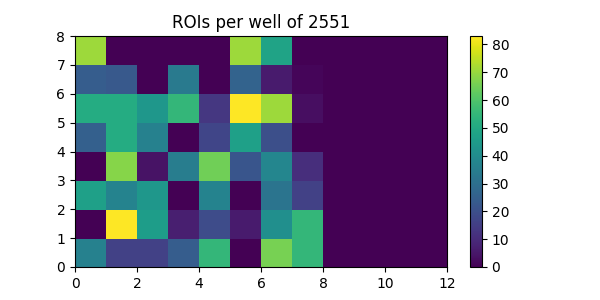

In [14]:
plt.title('ROIs per well of %s' % plate.id)
plt.pcolor(total)
plt.colorbar()
plt.show()

### License (BSD 2-Clause)¶

Copyright (C) 2016-2021 University of Dundee. All Rights Reserved.

Redistribution and use in source and binary forms, with or without modification, are permitted provided that the following conditions are met:

Redistributions of source code must retain the above copyright notice, this list of conditions and the following disclaimer. Redistributions in binary form must reproduce the above copyright notice, this list of conditions and the following disclaimer in the documentation and/or other materials provided with the distribution. THIS SOFTWARE IS PROVIDED BY THE COPYRIGHT HOLDERS AND CONTRIBUTORS "AS IS" AND ANY EXPRESS OR IMPLIED WARRANTIES, INCLUDING, BUT NOT LIMITED TO, THE IMPLIED WARRANTIES OF MERCHANTABILITY AND FITNESS FOR A PARTICULAR PURPOSE ARE DISCLAIMED. IN NO EVENT SHALL THE COPYRIGHT OWNER OR CONTRIBUTORS BE LIABLE FOR ANY DIRECT, INDIRECT, INCIDENTAL, SPECIAL, EXEMPLARY, OR CONSEQUENTIAL DAMAGES (INCLUDING, BUT NOT LIMITED TO, PROCUREMENT OF SUBSTITUTE GOODS OR SERVICES; LOSS OF USE, DATA, OR PROFITS; OR BUSINESS INTERRUPTION) HOWEVER CAUSED AND ON ANY THEORY OF LIABILITY, WHETHER IN CONTRACT, STRICT LIABILITY, OR TORT (INCLUDING NEGLIGENCE OR OTHERWISE) ARISING IN ANY WAY OUT OF THE USE OF THIS SOFTWARE, EVEN IF ADVISED OF THE POSSIBILITY OF SUCH DAMAGE.